In [41]:
import numpy as np
import matplotlib.pyplot as plt

fname = 'facet-ii_data/quadrupoles/quad_m1-34.ru1'
data = []
with open(fname,'r') as f:
    f.readline()
    for line in f:
        temp = line.rstrip().split(' ')
        d = []
        for ele in temp:
            if ele != '':
                d += [ele]
        data += [d]
data = np.asfarray(data)
data[:,0] =data[:,0] / np.max(data[:,0])
data[:,2] = -data[:,2]

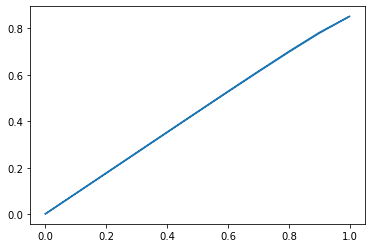

In [42]:
fig,ax = plt.subplots()
ax.plot(data[:,0],data[:,2])

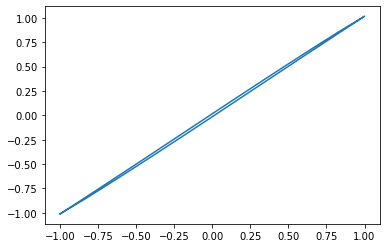

In [45]:
fname = 'facet-ii_data/quadrupoles/quad_m1-34.ru1'
data = []
with open(fname,'r') as f:
    f.readline()
    for line in f:
        temp = line.rstrip().split(' ')
        d = []
        for ele in temp:
            if ele != '':
                d += [ele]
        data += [d]
data = np.asfarray(data)
data[:, 1] = data[:, 1] / np.max(data[:, 1])
data[:, 3] = data[:, 3] * np.where(data[:,7] < 0, -1, 1)

fig,ax = plt.subplots()
ax.plot(data[:,1],data[:,3])

In [50]:
from pyro.infer.autoguide import AutoMultivariateNormal
from bayesian_utils import train, predict
from bayes_hysteresis_correlated import CorrelatedBayesianHysteresis
import hysteresis
import torch

h = torch.tensor(data[:,1]).double()
m = torch.tensor(data[:,3]).double()
hmodel = hysteresis.Hysteresis(h, -1, 1.0, 1.0, 25)
model = CorrelatedBayesianHysteresis(hmodel, 25, 0.1)

guide = AutoMultivariateNormal(model)
train(h, m, model, guide, 100000, 0.001)


calculating states


RuntimeError: expected scalar type Double but found Float
Trace Shapes:
 Param Sites:
Sample Sites:
Trace Shapes:
 Param Sites:
Sample Sites: